In [ ]:
!pip install ultralytics
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 2.2 MB/s eta 0:00:00


In [ ]:
# PREPARATION

import ultralytics
from ultralytics import YOLO
ultralytics.checks()

# from roboflow import Roboflow

import supervision as sv

import numpy as np

import glob
from IPython.display import Image, display

import cv2
from PIL import Image
from IPython.display import Image, display


Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.9/166.8 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive')

os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive'

In [ ]:
# TRAINING DATASET

# !yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=100 imgsz=640
# %cd {HOME}

# !yolo task=detect mode=train model=yolov8n.pt data="C:\Users\Fachri B\OneDrive\Desktop\KULIAH\TA\cobra8\city_problems-1\data.yaml" epochs=300 imgsz=640

# # Load the model.
# model = YOLO('yolov8m.pt')

# # Training.
# results = model.train(
#    data=r"/content/drive/MyDrive/f9/data.yaml",
#    imgsz=640,
#    epochs=1000,
#    name='f9_m'
#   #  lr0=0.01,
#   #  lrf=0.01,
#   #  patience=120
#    )

#Resume Training
model = YOLO(r"/content/drive/MyDrive/runs/detect/f9_m/weights/last.pt")
model.train(resume=True,
            patience=50
            )

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/runs/detect/f9_m/weights/last.pt, data=/content/drive/MyDrive/f9/data.yaml, epochs=1000, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=f9_m, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

In [ ]:
#Validation Dataset

!yolo task=detect \
mode=val \
model="/content/drive/MyDrive/runs/detect/f9_m/weights/best.pt" \
data="/content/drive/MyDrive/f9/data.yaml" \
name='f9m_val'

# # Load the model.
# model = r"C:\Users\Fachri B\OneDrive\Desktop\KULIAH\TA\cobra8\runs\detect\emergency_condition\weights\best.pt"

# # Training.
# model.val(
#     data=r"C:\Users\Fachri B\OneDrive\Desktop\KULIAH\TA\cobra8\city_problem-3\data.yaml",
#     name='emergency_condition_val')

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/f9/valid/labels.cache... 4770 images, 0 backgrounds, 0 corrupt: 100% 4770/4770 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 299/299 [00:35<00:00,  8.40it/s]
                   all       4770       7007      0.962      0.966      0.986      0.852
              accident       4770       1544      0.967      0.956      0.989      0.869
                  fire       4770       3443      0.938      0.956      0.975      0.798
           fallen tree       4770       2020      0.982      0.986      0.993      0.889
Speed: 0.2ms preprocess, 3.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/f9n_val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
#TESTING MODEL

!yolo task=detect \
mode=predict \
model="/content/drive/MyDrive/BC/runs/detect/ec7_yolov8m_train/weights/best.pt" \
source="/content/drive/MyDrive/BC/video/Insane Crazy Car Crashes From Around the World.mp4"\
show=True \
imgsz=640 \
conf=0.3 \
name=vid \
show_labels=True

In [ ]:
!pip install supervision

import supervision as sv
import numpy as np

Streaming output truncated to the last 5000 lines.
0: 640x640 1 accident, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 fire, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 fallen tree, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 accidents, 6.6ms
Speed: 1.6ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 fallen trees, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 fallen tree, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 fire, 6.3ms
Speed: 1.5ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 fallen tree, 6.9ms
Speed: 2.2ms preprocess, 6.9ms i

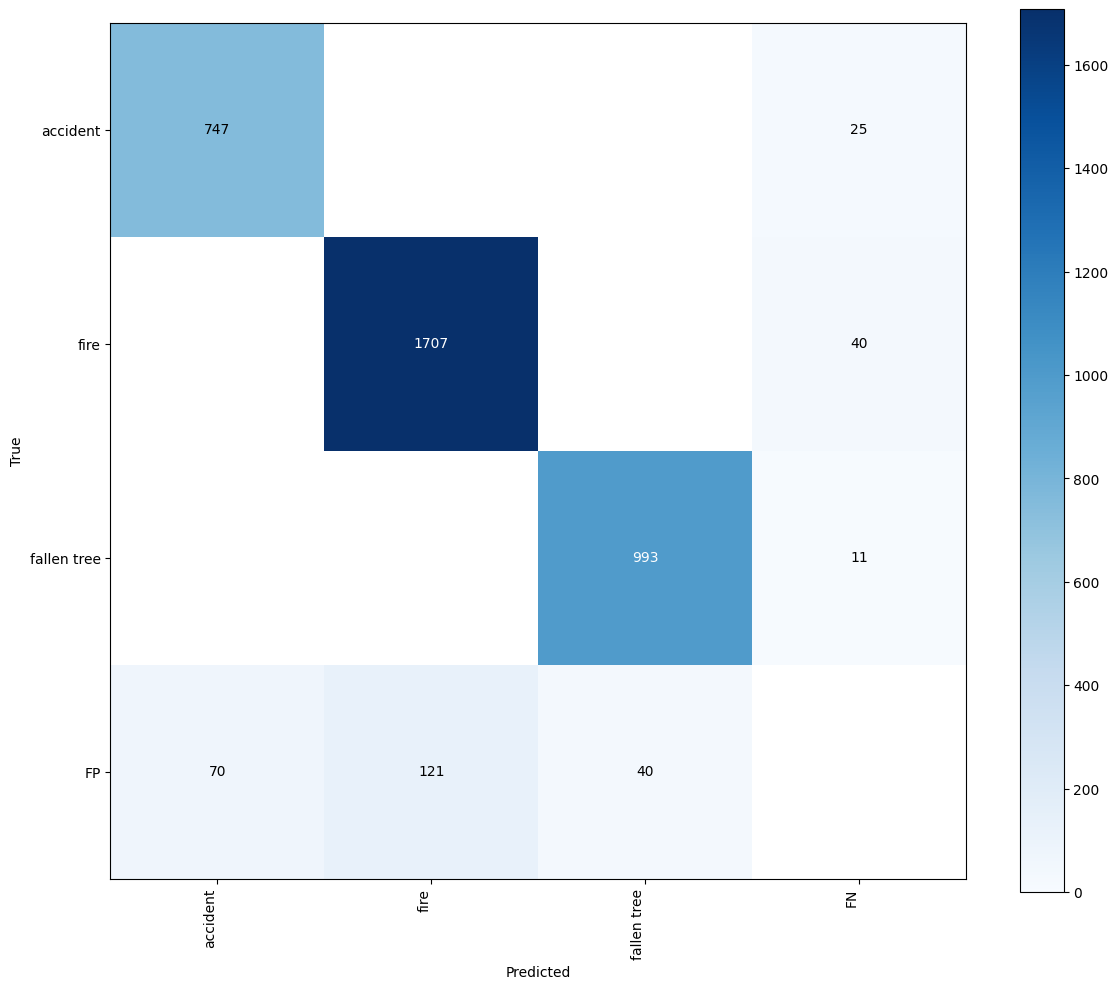

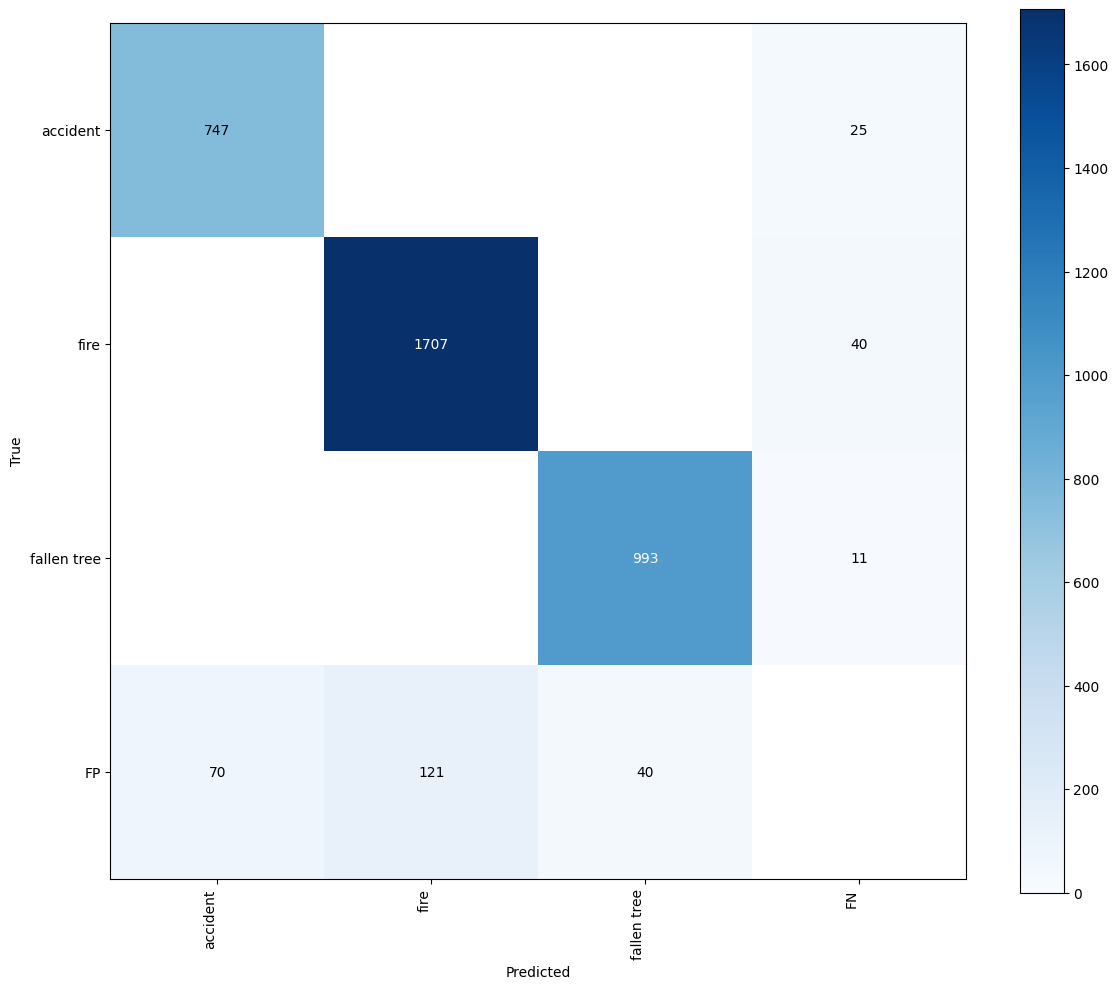

In [ ]:
#Test Dataset

# Define paths
annotations_dir = r"/content/drive/MyDrive/f9/test/labels"
data_yaml_path = r"/content/drive/MyDrive/f9/data.yaml"
images_directory_path = r"/content/drive/MyDrive/f9/test/images"

# Load dataset
dataset = sv.DetectionDataset.from_yolo(images_directory_path=images_directory_path, annotations_directory_path=annotations_dir, data_yaml_path=data_yaml_path)

# Load YOLOv8 model
model = YOLO(r"/content/drive/MyDrive/runs/detect/f9_n/weights/best.pt")

# Define callback function
def callback(image: np.ndarray) -> sv.Detections:
    result = model(image)[0]
    return sv.Detections.from_ultralytics(result)

# Confusion Matrix Benchmarking
confusion_matrix = sv.ConfusionMatrix.benchmark(dataset=dataset, callback=callback)

# Plotting Confusion Matrix
confusion_matrix.plot()